# IMPORTING LIBRARIES


In [ ]:
import numpy as np

from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for evaluating results

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


from sklearn.metrics import ConfusionMatrixDisplay


import pandas as pd # .csv , .xlsx

# LOADING DATASET


In [ ]:
iris = pd.read_csv("IRIS.csv")
#iris = datasets.load_iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Check kinds of label
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#From sklearn.preprocessing import LabelEncoder

#Encode the species
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

le = LabelEncoder()
le.fit(species)
iris['species'] = le.fit_transform(iris['species'].astype(str))

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Features x
iris_x = iris.drop('species', axis = 1)
iris_x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Features y
iris_y = iris['species']
iris_y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# SPLITTING DATA


In [ ]:
#From sklearn.model_selection import train_test_split

#Aim: 80% of training and 20% of testing

x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# VISUALIZING DATASET


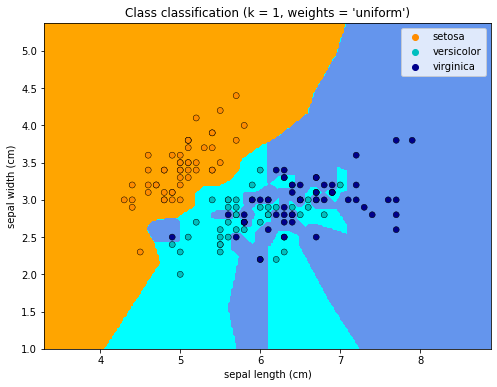

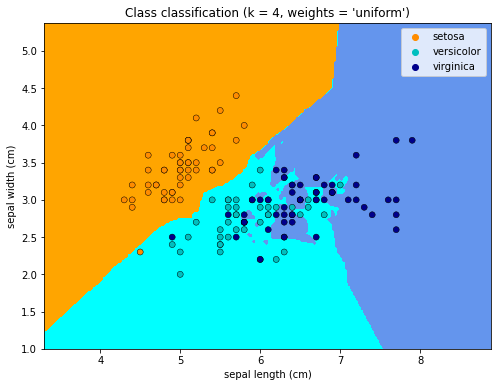

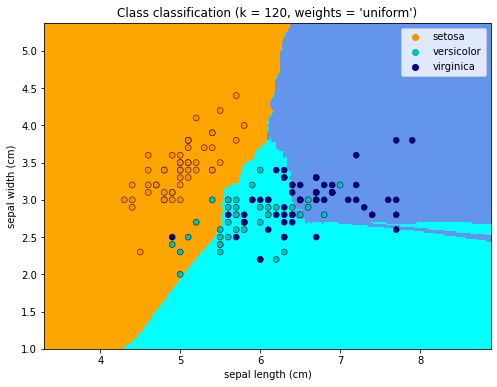

In [ ]:
# import some data to play with
iris_v = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris_v.data[:, :2]
y = iris_v.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for k in [1, 4, 120]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors= k, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris_v.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "Class classification (k = %i, weights = '%s')" % (k, 'uniform')
    )
    plt.xlabel(iris_v.feature_names[0])
    plt.ylabel(iris_v.feature_names[1])

plt.show()

In [ ]:
n_neighbors = 15

# import some data to play with
iris_t = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris_t.data[:, :2]
y = iris_t.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# NORMALIZATION

In [ ]:
#Aim: Input data must be ranged from 0 to 1

#From sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler


MinMaxScaler()

In [ ]:
scaler.fit(x_train) #Compute the minimum and maximum to be used for later scaling.
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)
x_train_norm

array([[0.33333333, 0.22727273, 0.50847458, 0.5       ],
       [0.66666667, 0.5       , 0.77966102, 0.95833333],
       [0.77777778, 0.45454545, 0.83050847, 0.83333333],
       [0.58333333, 0.40909091, 0.55932203, 0.5       ],
       [0.61111111, 0.54545455, 0.69491525, 0.79166667],
       [0.22222222, 0.68181818, 0.06779661, 0.08333333],
       [0.33333333, 0.27272727, 0.57627119, 0.45833333],
       [1.        , 0.81818182, 0.91525424, 0.79166667],
       [0.19444444, 0.59090909, 0.06779661, 0.04166667],
       [0.66666667, 0.59090909, 0.79661017, 0.83333333],
       [0.66666667, 0.45454545, 0.71186441, 0.91666667],
       [0.47222222, 0.40909091, 0.59322034, 0.58333333],
       [0.02777778, 0.40909091, 0.06779661, 0.04166667],
       [0.55555556, 0.63636364, 0.77966102, 0.95833333],
       [0.25      , 0.63636364, 0.06779661, 0.04166667],
       [0.33333333, 1.        , 0.06779661, 0.04166667],
       [0.08333333, 0.63636364, 0.06779661, 0.08333333],
       [0.30555556, 0.77272727,

# FINDING AN OPTIMAL K 

## Euclidean metric measurement

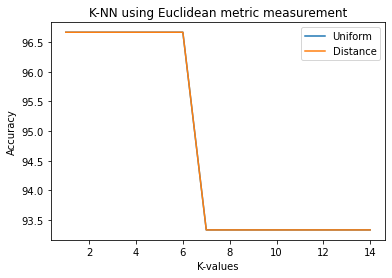

In [ ]:
accuracy, accuracy_1, k_order = [], [], []

for k in range (1, 15):
    model = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'uniform', p= 2, metric= 'minkowski')
    model.fit(x_train_norm, y_train)
    y_pred_4 = model.predict(x_test_norm)
    accuracy.append(100*accuracy_score(y_test, y_pred_4))
  

    model_1 = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'distance', p= 2, metric= 'minkowski')
    model_1.fit(x_train_norm, y_train)
    y_pred_1 = model_1.predict(x_test_norm)
    accuracy_1.append(100*accuracy_score(y_test, y_pred_1))
    k_order.append(k)
#Plotting data
plt.plot(k_order, accuracy, label = 'Uniform')
plt.plot(k_order, accuracy_1, label = 'Distance')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-NN using Euclidean metric measurement')
plt.legend()

##MANHATTAN METRIC MEASUREMENT 


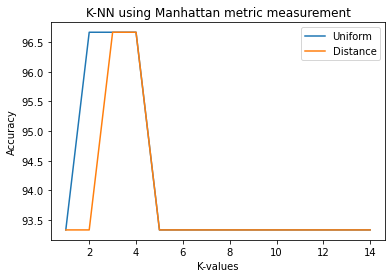

In [ ]:
accuracy_2, accuracy_3 = [], []
for k in range (1, 15):
    model_2 = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'uniform', p= 1, metric= 'minkowski')
    model_2.fit(x_train_norm, y_train)
    y_pred_2 = model_2.predict(x_test_norm)
    accuracy_2.append(100*accuracy_score(y_test, y_pred_2))

    model_3 = neighbors.KNeighborsClassifier(n_neighbors= k, weights= 'distance', p= 1, metric= 'minkowski')
    model_3.fit(x_train_norm, y_train)
    y_pred_3 = model_3.predict(x_test_norm)
    accuracy_3.append(100*accuracy_score(y_test, y_pred_3))

#Plotting data
plt.plot(k_order, accuracy_2, label = 'Uniform')
plt.plot(k_order, accuracy_3, label = 'Distance')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-NN using Manhattan metric measurement')
plt.legend()

# K-NEAREST NEIGHBORS
All three are algorithms used for the Nearest Neighbour search. The **Ball Tree** and the **KD Tree algorithm** are tree algorithms used for spatial division of data points and their allocation into…

In [ ]:
#I decided to design a Euclidean K-NN
neigh = KNeighborsClassifier(n_neighbors=  4, weights= 'distance', algorithm= 'auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
neigh.fit(x_train_norm, y_train)

#Predicted labels
y_test_pred = neigh.predict(x_test_norm)
y_test_pred

array([1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 1, 1])

In [ ]:
#Ground truth
np.array(y_test)

array([1, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 1, 1])

# CONFUSION MATRIX
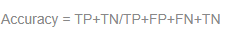
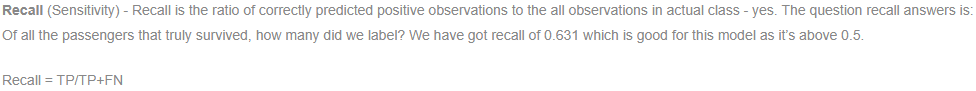
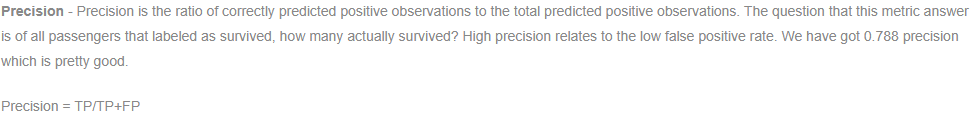
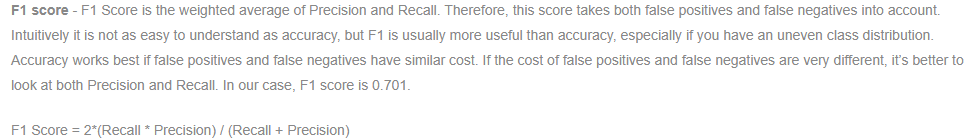

Classification report using the K-NNClassifier: 
Test accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



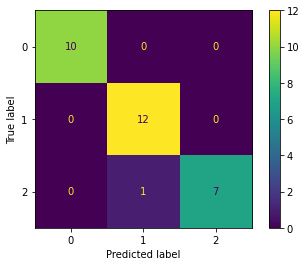

In [ ]:
print('Classification report using the K-NNClassifier: ')
print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()

plt.show()